# Neural Network Training: Implementing Backpropagation and Model Optimization


In [2]:
import numpy as np
from parameters import *
from utils import data
from model import NeuralNetwork
import matplotlib.pyplot as plt


The goal of this project is to create a neural network with 3 layers: input - hidden - output. Both the input layer and the output layer will have 8 nodes, the hidden layer only 3 nodes(+ biases).

The learning examples will each have 7 zeros and 1 one in them(so there will be only 8 different learning examples, and you will have to repeat the,) and the ouput the network should learn is exactly the same as the input.  So when the input layer is given < 0,0,0,1,0,0,0,0 > as input, the output to aim for is also < 0,0,0,1,0,0,0,0 >.

We train the neural network using **Gradient Descent**.

We want our network to learn this reproducing function on the 8different learning examples. 

In [3]:
# create data
data = data()

# create neural network
nn = NeuralNetwork()
nn.init_weights()

Now is time to train the neural network. You can modify the training parameters in the file "parameters.py" file. 

You have 4 different parameters: 
- **LAYERS**: The list in which the lenght corresponds to the number of layers whether the elements correspond to the number of nodes por layer. 
- **BATCH_SIZE**: Refers to the number of training examples utilized in one iteration of model training. 
- **LAMBDA**: The **regularization term**. Regularization helps the network maintaining the weights in a reasonable range, avoiding them to become too high or too low. 
- **ALPHA**: The **learning rate** is a hyperparameter that determines the size of the steps taken towards the minimum of the loss function during training. A too-high learning rate can lead to overshoot the minimum, while a too-low rate can result in slow convergence or getting stuck in local minima.
- **EPOCHS**: Number of complete passes through the entire training dataset. 



In [4]:
nn.train(data)

Training Time: 1.3842675685882568, Loss: 0.125, Learning Rate: 0.002, Regolation Term: 0.0001, Batch Size: 8


In [5]:
tolerance = 0.0001
cons_epochs = 5

count_stable = 0
epoch_stabilized = -1
for i in range(1, len(nn.average_losses)):
    if abs(nn.average_losses[i] - nn.average_losses[i-1]) < tolerance:
        count_stable += 1
    else:
        count_stable = 0
    
    if count_stable >= cons_epochs:
        epoch_stabilized = i  
        break

if epoch_stabilized != -1:
    print(f"The training stabilized at epoch {epoch_stabilized + 1} with average loss: {nn.average_losses[epoch_stabilized]}")
else:
    print("The training did not stabilize.")

The training stabilized at epoch 149 with average loss: 0.11684227611035705


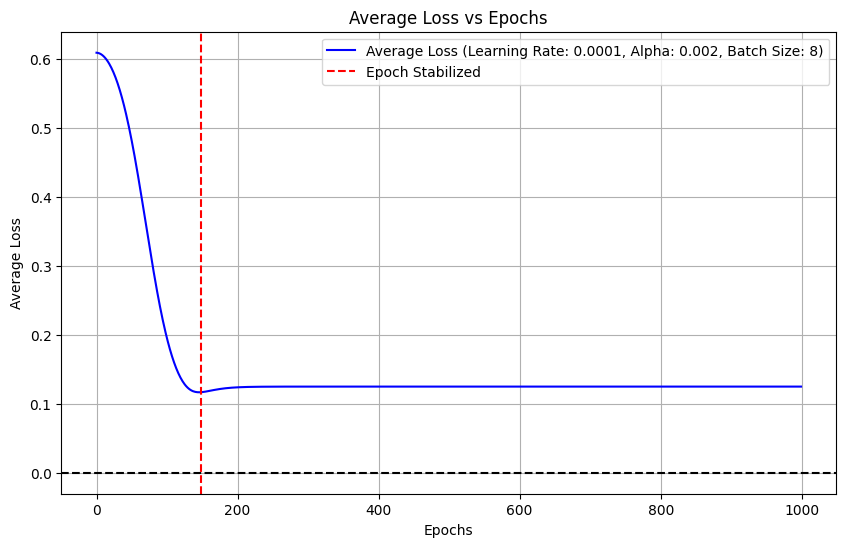

In [6]:
#plot the loss
losses = nn.average_losses

plt.figure(figsize=(10, 6))
plt.plot(
    losses, label=f"Average Loss (Learning Rate: {LAMBDA}, Alpha: {ALPHA}, Batch Size: {BATCH_SIZE})", color="blue"
)
plt.title("Average Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Average Loss")
plt.legend()
plt.grid()
plt.axhline(y=0, color="black", linestyle="--")

if epoch_stabilized != -1:  
    plt.axvline(x=epoch_stabilized, color='red', linestyle='--', label='Epoch Stabilized')

plt.legend()
plt.show()
plt.show()

Training Time: 1.3016188144683838, Loss: 0.12474045759478042, Learning Rate: 0.0001, Regolation Term: 1e-05, Batch Size: 8
Training Time: 1.4812679290771484, Loss: 0.12499999999997605, Learning Rate: 0.001, Regolation Term: 1e-05, Batch Size: 8
Training Time: 1.420393943786621, Loss: 0.125, Learning Rate: 0.01, Regolation Term: 1e-05, Batch Size: 8
Training Time: 1.3786189556121826, Loss: 0.12467263870492204, Learning Rate: 0.0001, Regolation Term: 0.0001, Batch Size: 8
Training Time: 1.2475461959838867, Loss: 0.12499999999998006, Learning Rate: 0.001, Regolation Term: 0.0001, Batch Size: 8
Training Time: 1.0164320468902588, Loss: 0.125, Learning Rate: 0.01, Regolation Term: 0.0001, Batch Size: 8
Training Time: 1.0026776790618896, Loss: 0.12474958752092916, Learning Rate: 0.0001, Regolation Term: 0.001, Batch Size: 8
Training Time: 0.9838874340057373, Loss: 0.1249999999998829, Learning Rate: 0.001, Regolation Term: 0.001, Batch Size: 8
Training Time: 0.9152565002441406, Loss: 0.125, Le

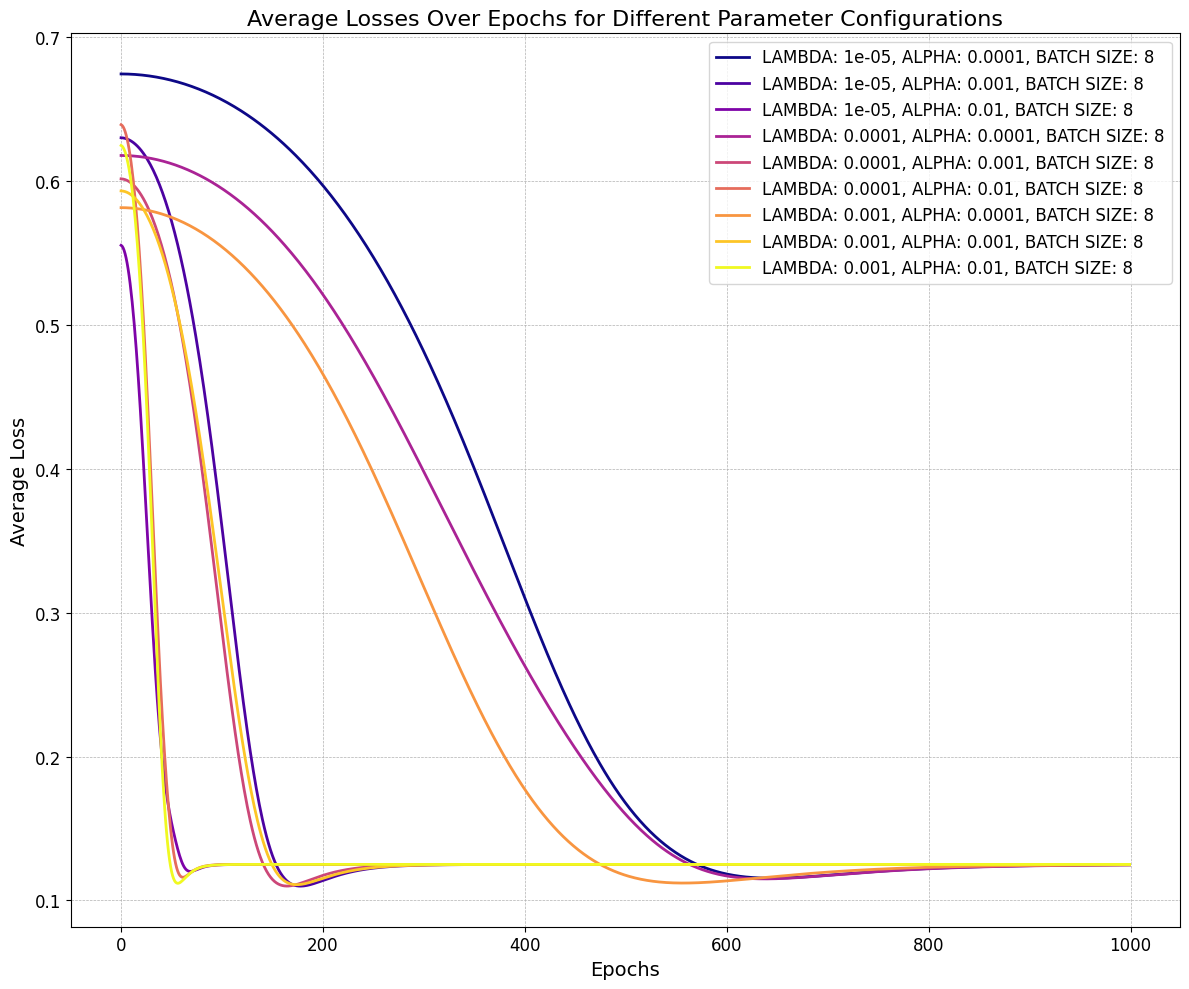

In [7]:
import numpy as np
import matplotlib.pyplot as plt

lambda_values = [0.00001, 0.0001, 0.001]
alpha_values = [0.0001, 0.001, 0.01]
b_size = [8]
num_configs = len(lambda_values) * len(alpha_values)
losses = dict()
for b in b_size:
    for lambd in lambda_values:
        for alpha in alpha_values:
            nn = NeuralNetwork(alpha=alpha, lambd=lambd)
            nn.init_weights()
            nn.train(data, batch_size=b)
            losses[(lambd, alpha, b)] = nn

plt.figure(figsize=(12, 10))
colors = plt.cm.plasma(np.linspace(0, 1, num_configs))  
i = 0

for lambd in lambda_values:
    for alpha in alpha_values:
        for b in b_size:
            if b == 8:
                line_style = '-'  
            net: NeuralNetwork = losses[(lambd, alpha, b)] 
            plt.plot(net.average_losses, color=colors[i], linestyle=line_style, linewidth=2, label=f'LAMBDA: {lambd}, ALPHA: {alpha}, BATCH SIZE: {b}')
        i += 1

plt.title('Average Losses Over Epochs for Different Parameter Configurations', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Average Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()  
plt.show()



Training Time: 0.21477222442626953, Loss: 0.1249999999999997, Learning Rate: 0.01, Regolation Term: 0.001, Batch Size: 1
Training Time: 0.4388091564178467, Loss: 0.125, Learning Rate: 0.01, Regolation Term: 0.001, Batch Size: 3
Training Time: 0.9312024116516113, Loss: 0.125, Learning Rate: 0.01, Regolation Term: 0.001, Batch Size: 8


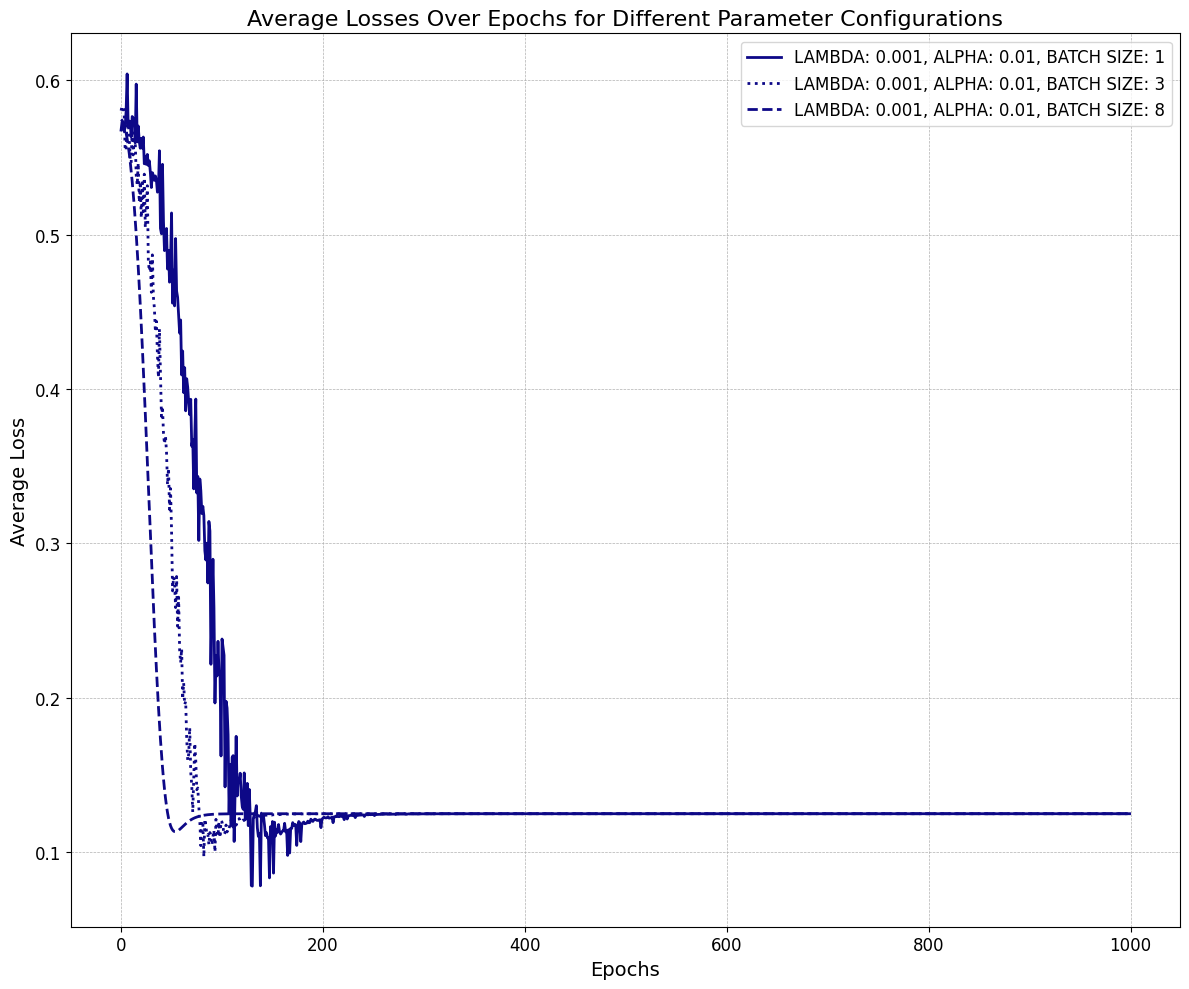

In [8]:
lambda_values = [ 0.001]
alpha_values = [0.01]
b_size = [1, 3, 8]
num_configs = len(lambda_values) * len(alpha_values)
losses = dict()
for b in b_size:
    for lambd in lambda_values:
        for alpha in alpha_values:
            nn = NeuralNetwork(alpha=alpha, lambd=lambd)
            nn.init_weights()
            nn.train(data, batch_size=b)
            losses[(lambd, alpha, b)] = nn

plt.figure(figsize=(12, 10))
colors = plt.cm.plasma(np.linspace(0, 1, num_configs))  
i = 0

for lambd in lambda_values:
    for alpha in alpha_values:
        for b in b_size:
            if b == 1:
                line_style = '-'  # Solid line for batch size 1
            elif b == 8:
                line_style = '--'  # Dashed line for batch size 8
            else:
                line_style = ':' 
            net: NeuralNetwork = losses[(lambd, alpha, b)] 
            plt.plot(net.average_losses, color=colors[i], linestyle=line_style, linewidth=2, label=f'LAMBDA: {lambd}, ALPHA: {alpha}, BATCH SIZE: {b}')
        i += 1

plt.title('Average Losses Over Epochs for Different Parameter Configurations', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Average Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()  
plt.show()


Based on the trials conducted, the neural network exhibits faster convergence with the parameter configurations of 𝜆=0.001, 𝛼=0.01α=0.01, and batch_size=8. This suggests that these specific values for the regularization parameter, learning rate, and batch size are particularly effective in facilitating the training process. As a result, the network is able to achieve lower average losses more rapidly compared to other configurations tested.


Moreover, it is noteworthy that the data being orthogonal to each other contributes to significant variability in the training losses, especially when employing a batch size of one. In this scenario, the model experiences highly fluctuating and inconsistent loss values, which can hinder its ability to learn effectively. Each individual sample directs the optimization in different directions, resulting in a noisy training process. In contrast, utilizing a mini-batch size, such as 8, mitigates this issue by providing more stable updates and enabling the model to generalize better from the data, ultimately leading to improved convergence and performance.

**Optuna optimization**

[I 2024-11-04 14:31:44,395] A new study created in memory with name: no-name-38b7469d-691b-46ef-89d4-8422ba076d16
C:\Users\Aurora Pia Ghiardell\AppData\Local\Temp\ipykernel_2032\4252696553.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambd = trial.suggest_loguniform('lambda', 1e-5, 1e-1)
C:\Users\Aurora Pia Ghiardell\AppData\Local\Temp\ipykernel_2032\4252696553.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-4, 1e-2)
[I 2024-11-04 14:31:45,452] Trial 0 finished with value: 0.12499644317052716 and parameters: {'lambda': 0.0006444050773844752, 'alpha': 0.00019113260831476458, 'batch_size': 8}. Best is trial 0 with va

Training Time: 1.0527839660644531, Loss: 0.12499644317052716, Learning Rate: 0.00019113260831476458, Regolation Term: 0.0006444050773844752, Batch Size: 8


[I 2024-11-04 14:31:46,445] Trial 1 finished with value: 0.12499944995516478 and parameters: {'lambda': 0.04480238289619859, 'alpha': 0.00021291275451830425, 'batch_size': 8}. Best is trial 0 with value: 0.12499644317052716.


Training Time: 0.9904248714447021, Loss: 0.12499944995516478, Learning Rate: 0.00021291275451830425, Regolation Term: 0.04480238289619859, Batch Size: 8


[I 2024-11-04 14:31:47,457] Trial 2 finished with value: 0.12499999039870538 and parameters: {'lambda': 0.013736455345247655, 'alpha': 0.0003457613152845435, 'batch_size': 8}. Best is trial 0 with value: 0.12499644317052716.


Training Time: 1.0080547332763672, Loss: 0.12499999039870538, Learning Rate: 0.0003457613152845435, Regolation Term: 0.013736455345247655, Batch Size: 8


[I 2024-11-04 14:31:48,484] Trial 3 finished with value: 0.1249979922768335 and parameters: {'lambda': 0.006255468123941646, 'alpha': 0.00019114250885615954, 'batch_size': 8}. Best is trial 0 with value: 0.12499644317052716.


Training Time: 1.023772954940796, Loss: 0.1249979922768335, Learning Rate: 0.00019114250885615954, Regolation Term: 0.006255468123941646, Batch Size: 8


[I 2024-11-04 14:31:49,506] Trial 4 finished with value: 0.125 and parameters: {'lambda': 3.766938049609408e-05, 'alpha': 0.002361033577852961, 'batch_size': 8}. Best is trial 0 with value: 0.12499644317052716.


Training Time: 1.0202643871307373, Loss: 0.125, Learning Rate: 0.002361033577852961, Regolation Term: 3.766938049609408e-05, Batch Size: 8


[I 2024-11-04 14:31:50,587] Trial 5 finished with value: 0.12499964726913065 and parameters: {'lambda': 0.052162954340091994, 'alpha': 0.00023262247286656002, 'batch_size': 8}. Best is trial 0 with value: 0.12499644317052716.


Training Time: 1.0782394409179688, Loss: 0.12499964726913065, Learning Rate: 0.00023262247286656002, Regolation Term: 0.052162954340091994, Batch Size: 8


[I 2024-11-04 14:31:51,813] Trial 6 finished with value: 0.12499999999999999 and parameters: {'lambda': 7.029907623974958e-05, 'alpha': 0.0013631037684568885, 'batch_size': 8}. Best is trial 0 with value: 0.12499644317052716.


Training Time: 1.2246277332305908, Loss: 0.12499999999999999, Learning Rate: 0.0013631037684568885, Regolation Term: 7.029907623974958e-05, Batch Size: 8


[I 2024-11-04 14:31:52,887] Trial 7 finished with value: 0.12499999999769737 and parameters: {'lambda': 0.001357530141299945, 'alpha': 0.0011231682962876452, 'batch_size': 8}. Best is trial 0 with value: 0.12499644317052716.


Training Time: 1.0717320442199707, Loss: 0.12499999999769737, Learning Rate: 0.0011231682962876452, Regolation Term: 0.001357530141299945, Batch Size: 8


[I 2024-11-04 14:31:53,874] Trial 8 finished with value: 0.12499999810707009 and parameters: {'lambda': 0.01775618384551818, 'alpha': 0.00046500558716499035, 'batch_size': 8}. Best is trial 0 with value: 0.12499644317052716.


Training Time: 0.9834268093109131, Loss: 0.12499999810707009, Learning Rate: 0.00046500558716499035, Regolation Term: 0.01775618384551818, Batch Size: 8


[I 2024-11-04 14:31:54,883] Trial 9 finished with value: 0.125 and parameters: {'lambda': 6.481758378653075e-05, 'alpha': 0.005642975467409715, 'batch_size': 8}. Best is trial 0 with value: 0.12499644317052716.


Training Time: 1.0065934658050537, Loss: 0.125, Learning Rate: 0.005642975467409715, Regolation Term: 6.481758378653075e-05, Batch Size: 8
Best parameters: {'lambda': 0.0006444050773844752, 'alpha': 0.00019113260831476458, 'batch_size': 8}
Best loss: 0.12499644317052716
Training Time: 0.9943196773529053, Loss: 0.12499727561309232, Learning Rate: 0.00019113260831476458, Regolation Term: 0.0006444050773844752, Batch Size: 8


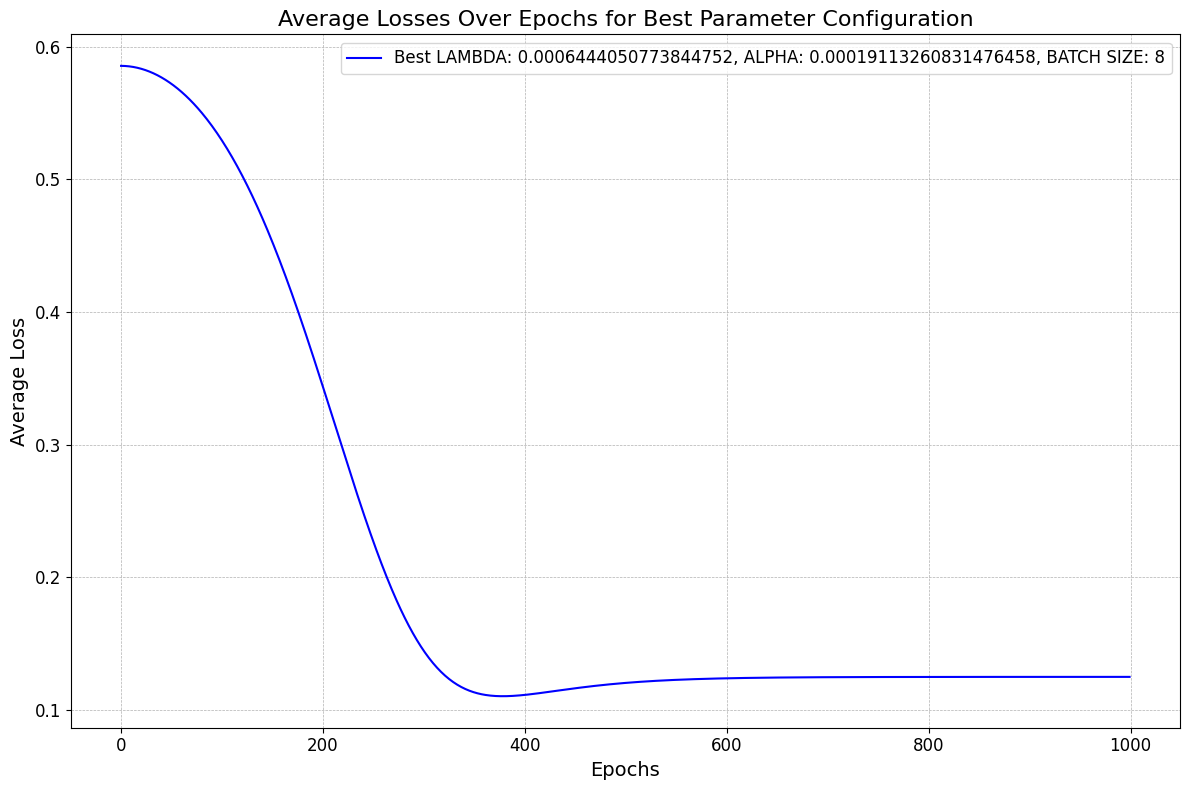

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import optuna


def objective(trial):
    lambd = trial.suggest_loguniform('lambda', 1e-5, 1e-1)
    alpha = trial.suggest_loguniform('alpha', 1e-4, 1e-2)
    batch_size = trial.suggest_categorical('batch_size', [8])

    nn = NeuralNetwork(alpha=alpha, lambd=lambd)
    nn.init_weights()
    nn.train(data, batch_size=batch_size)  

    return nn.average_losses[-1] 

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10) 

print(f"Best parameters: {study.best_params}")
print(f"Best loss: {study.best_value}")

best_params = study.best_params
best_nn = NeuralNetwork(alpha=best_params['alpha'], lambd=best_params['lambda'])
best_nn.init_weights()
best_nn.train(data, batch_size=best_params['batch_size'])

plt.figure(figsize=(12, 8))
plt.plot(best_nn.average_losses, color='blue', label=f'Best LAMBDA: {best_params["lambda"]}, ALPHA: {best_params["alpha"]}, BATCH SIZE: {best_params["batch_size"]}')
plt.title('Average Losses Over Epochs for Best Parameter Configuration', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Average Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)

plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


# Weights and Activation Interpretation

Layer 1 - Min weight: 0.020649258781960663, Max weight: 0.8457980908046248


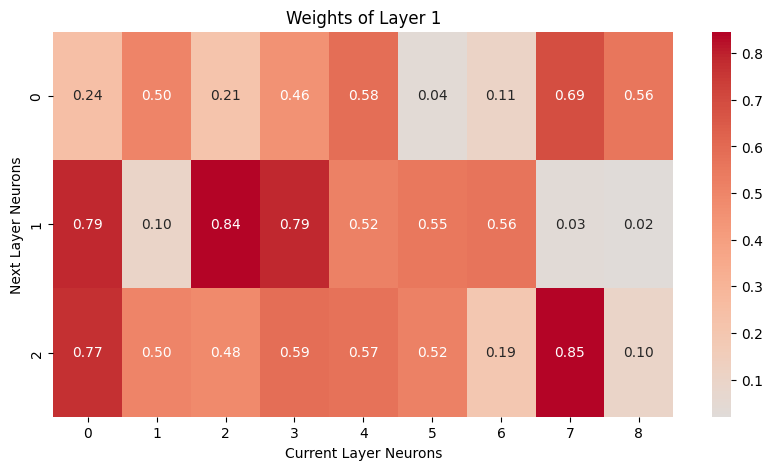

Layer 2 - Min weight: -4.963821382406087, Max weight: -2.169286650865651


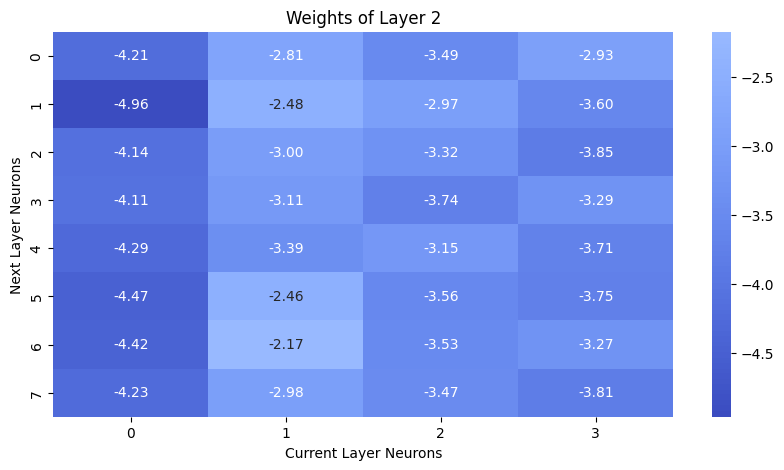

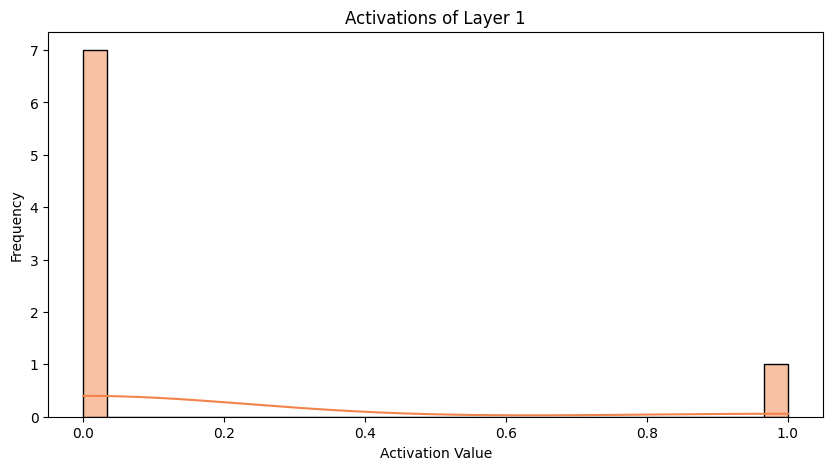

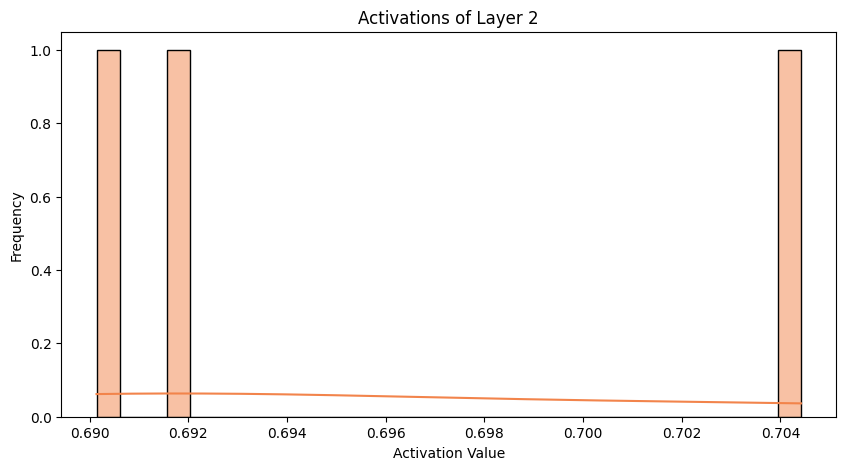

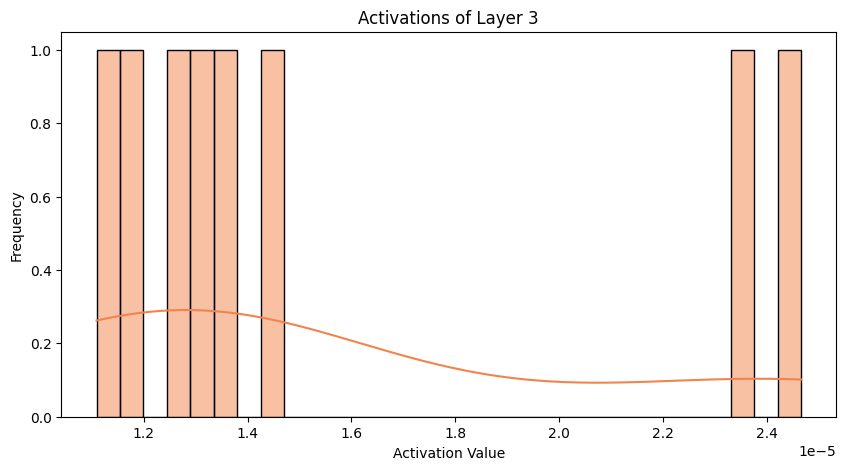

In [14]:
import seaborn as sns

weights = best_nn.weights
activations = best_nn.activations

def plot_weights(weights):
    for i, weight_matrix in enumerate(weights):
        plt.figure(figsize=(10, 5))

        min_val, max_val = weight_matrix.min(), weight_matrix.max()
        print(f"Layer {i+1} - Min weight: {min_val}, Max weight: {max_val}")

        vmin, vmax = (min_val, max_val) if min_val != max_val else (-1, 1)

        sns.heatmap(
            weight_matrix,
            cmap="coolwarm",
            annot=True,
            fmt=".2f",
            center=0,
            vmin=vmin,
            vmax=vmax,
        )
        plt.title(f"Weights of Layer {i+1}")
        plt.xlabel("Current Layer Neurons")
        plt.ylabel("Next Layer Neurons")
        plt.show()


plot_weights(weights)


def plot_activations(activations):
    for i, activation in enumerate(activations):
        plt.figure(figsize=(10, 5))
        sns.histplot(
            activation,
            bins=30,
            kde=True,
            color=sns.color_palette("plasma", as_cmap=True)(0.7),
        )
        plt.title(f"Activations of Layer {i+1}")
        plt.xlabel("Activation Value")
        plt.ylabel("Frequency")
        plt.show()


plot_activations(activations)




*Weight Explanation*

Axes explanation: 
- The x-axis("Current Layer Neurons") represents the neurons in the current(input) layer.
- The u-axis("Next Layer Neurons") represents the neurons in the next (output) layer.

Matrix Cells: 
- Each cell in the heatmap corresponds to the weight of the connection between a neuron in the current layer (input) and a neuron in the next layer (output).

For instance, neuron 1 in the next layer has a strong weight (0.92) from neuron 3 in the current layer, meaning neuron 3 in the input has a significant influence on neuron 1 in the output layer.
On the other hand, some neurons have very low weights (like 0.02 between neuron 0 and neuron 3), indicating weak influence. 

We see that:
- layers 1-2: the strongest connections are the one: 1 - 0, 2 - 2, 3 - 1, 6- 0.
- layers 2-3: the strongest negative connections are: 0 - 0, 0 - 1, 0 - 3. 
